<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regresion with Neural Networks in Tensorflow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter predicting a number

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2024-08-20 14:35:33.605318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 14:35:33.622421: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 14:35:33.627783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 14:35:33.639136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.17.0


## Creating data to view and fit

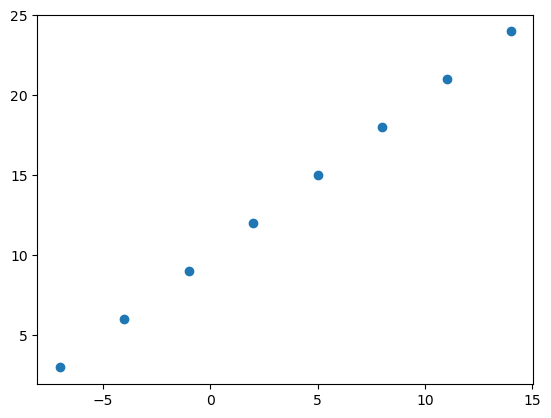

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
X[0], y[0]

(-7.0, 3.0)

In [5]:
X[1],y[1]

(-4.0, 6.0)

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

I0000 00:00:1724160937.736781   78906 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724160937.759113   78906 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724160937.759339   78906 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724160937.760915   78906 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(-7.0, 3.0)

In [11]:
# Turn numpy arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y.shape


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 TensorShape([8]))

In [12]:
input_shape = X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

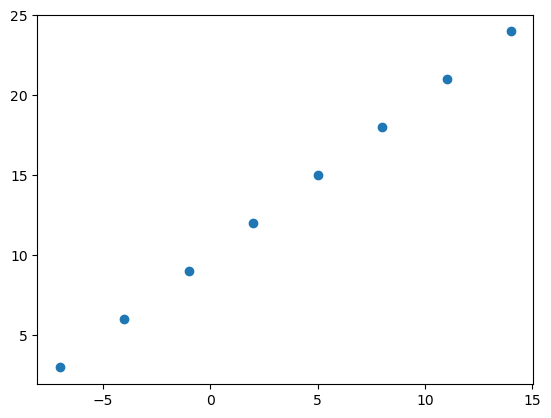

In [13]:
plt.scatter(X,y)

## Steps in modelling with tensorflow
1. Creating a model - define input and output  layers as well as hidden layers of model
2. Compiling a model - define loss function(tells how wrong model is) and the optimizer(improves model and tells us how to improve) evaluation metrics(gauges how well model performs)
3. Fitting the model(where model learns patterns in data)

In [14]:
tf.random.set_seed(42)

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line


Epoch 1/5


In [ ]:
X,y

In [ ]:
y_pred = model.predict([11.0])
y_pred

## Improving our model
We can improve our model, by altering the steps we took to create the model

1. creating a model - here we might add more layers, increase hidden units within each hidden layer, change activation func of layers
2. compiling a model - here we might change optimization function or perhaps the learning rate of the optimization function
3. fitting a model - here we might fit a model for more epochs or on more data

In [ ]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


In [ ]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

In [ ]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


In [ ]:
X,y

In [160]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 97ms/step


array([[26.11716]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when building a neural network is:

``` build a model -> fit it -> evaluate it -> tweak a model -> evaluate it -> repeat

When it comes to evaluation experiment experiment experiment
When it comes to evaluation it's
> visualization, visualization, visualization
It's a good idea to visualize
* The data - imagine what it looks like
* The model itself - what does our model look like?
* The training of a model - how does model perform while it learns?
* The predictions of the model - how do predictions line up with the ground truth

In [161]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [162]:
# Make labels for the datase
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

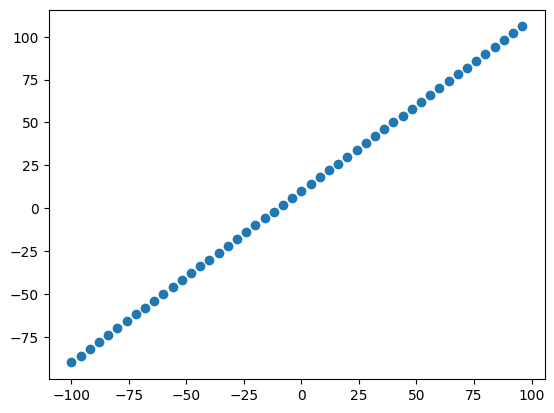

In [163]:
# visualize the data
plt.scatter(X,y)

### The 3 sets....

* **Training** - the model used to train the data, usually 70 - 80 % of the total amount of data
* **Validation** - Used to validate how well the model performs usually around 10% of the total available data
* **Test** - provides an unbiased account of how well the model is performing usually 10 - 15 % of the total available data

We want the model to be able to generalize - performs well on data which the model hasn't seen before and learns generalised patterns within the data

In [164]:
# Check the length of how many samples we have
len(X)

50

In [165]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got the data in training and test sets... let's visualize it again!

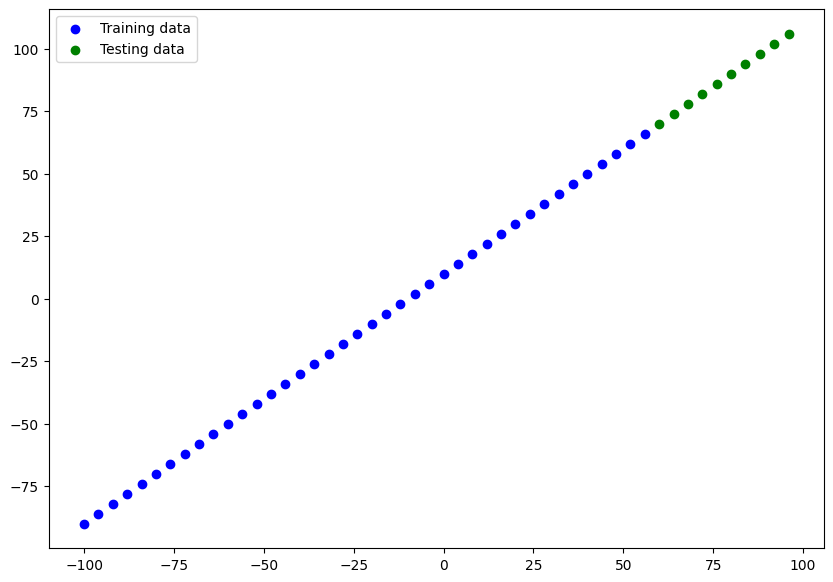

In [166]:
plt.figure(figsize=(10,7))

# plot the training data in blue
plt.scatter(X_train,y_train, c='b',label="Training data")
plt.scatter(X_test, y_test, c="g",label=("Testing data"))
plt.legend()

# Let's have a look at how to build a neural network with our data

In [167]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1714 - mae: 10.1714
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 10.8387 - mae: 10.8387
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 16.5626 - mae: 16.5626
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1790 - mae: 10.1790
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 13.1196 - mae: 13.1196
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 13.7529 - mae: 13.7529
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4295 - mae: 10.4295
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.6516 - mae: 11.6516
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8807 - mae: 9.8807
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 9.9271 - mae: 9.9271
Epoch 11/100
2/2 [==============================] - 0s 10

# Visualizing the model

In [168]:
model.build()

In [169]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [170]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [171]:
# let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
# create a model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,name="output_layer")
], name="One_of_the_many_models_we_will_build")
# compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),metrics=["mae"])
#fit the model
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_73 (Dense)            (None, 10)                110       
                                                                 
 dense_74 (Dense)            (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total parameters** - total nums of parameters in the model
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** - these parameters aren't updated during training(this usually occurs during transfer learning)

** Resource ** For more in depth overview of trainable parameters within a layer checkout MIT's intro to deep-learning video http://introtodeeplearning.com/

In [172]:
# lets fit our model to the training data
model.fit(X_train,y_train, epochs=100, verbose=0)

In [173]:
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_73 (Dense)            (None, 10)                110       
                                                                 
 dense_74 (Dense)            (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test`or `y_true`vs `y_pred`(ground truth versus models prediction's)

In [174]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 71ms/step


array([[ 74.74285 ],
       [ 79.67114 ],
       [ 84.59942 ],
       [ 89.52771 ],
       [ 94.455986],
       [ 99.38426 ],
       [104.31254 ],
       [109.24084 ],
       [114.16913 ],
       [119.097404]], dtype=float32)

In [175]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you feel like you're going to reuse a piece of code turn it into function

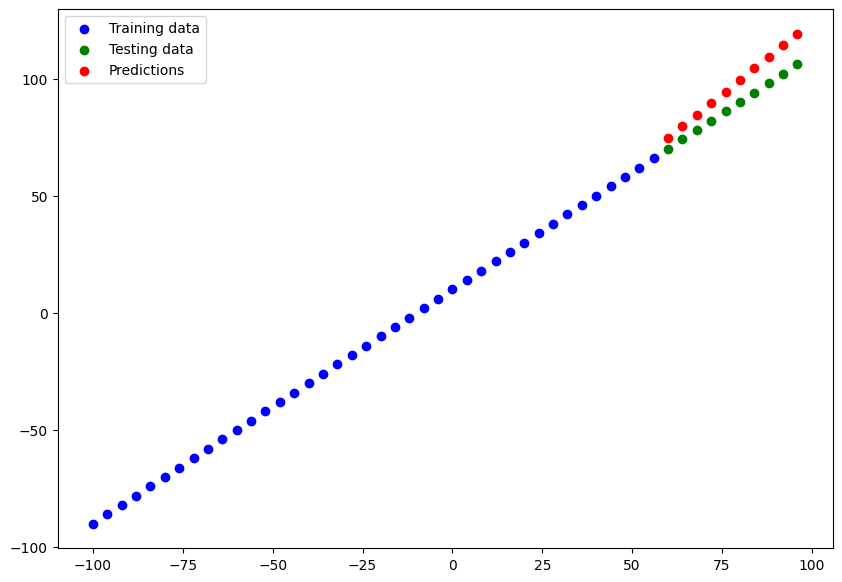

In [176]:
# let's create a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth
  """
  plt.figure(figsize=[10,7])
  # Training data
  plt.scatter(train_data,train_labels,c="blue",label="Training data")
  # Test data
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # plot predictions
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.  

Since we're working on regression problems, two of the main metrics we will use are:

* MAE - mean absolute error: on average, how wrong are our predictions
* MSE - mean squared error: square of average errors

In [177]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 139ms/step - loss: 8.9201 - mae: 8.9201


[8.920127868652344, 8.920127868652344]

In [178]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mae)

tf.Tensor(
[14.354289 11.731543 10.280116 10.       10.982394 13.230557 16.65003
 21.240837 26.169128 31.097406], shape=(10,), dtype=float32)


In [179]:
y_pred

array([[ 74.74285 ],
       [ 79.67114 ],
       [ 84.59942 ],
       [ 89.52771 ],
       [ 94.455986],
       [ 99.38426 ],
       [104.31254 ],
       [109.24084 ],
       [114.16913 ],
       [119.097404]], dtype=float32)

In [180]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [181]:
# needed to be done for both mae and mse as they weren't of the same shame(10,1) for y_pred vs (10,) for y_test
y_pred = tf.squeeze(y_pred)

In [182]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mse)

tf.Tensor(86.67779, shape=(), dtype=float32)


In [183]:
def mean_absolute_error(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))

def mean_squared_error(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))


### Running experiements to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> repeat
```

1. Get more data - more examples for the model to train on
2. Make the model larger (using a more complex model) - this might be adding more layers or units per layer
3. Train for longer number of epochs

Let's do 3 different experiements

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers trained for 100 epochs
3. `model_3` - 2 layers trained for 500 epochs
4.
5.

In [184]:
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [185]:
X_train,y_train


(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [186]:
X_train = tf.expand_dims(X_train, axis=-1)

In [187]:
X_train

<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56]], dtype=int32)>

In [188]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 53.6147 - mae: 53.6147
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 19.8104 - mae: 19.8104
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 7.6361 - mae: 7.6361
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9836 - mae: 9.9836
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9546 - mae: 10.9546
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1242 - mae: 10.1242
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1518 - mae: 9.1518
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1195 - mae: 9.1195
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 15.1463 - mae: 15.1463
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5762 - mae: 7.5762
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 47ms/step


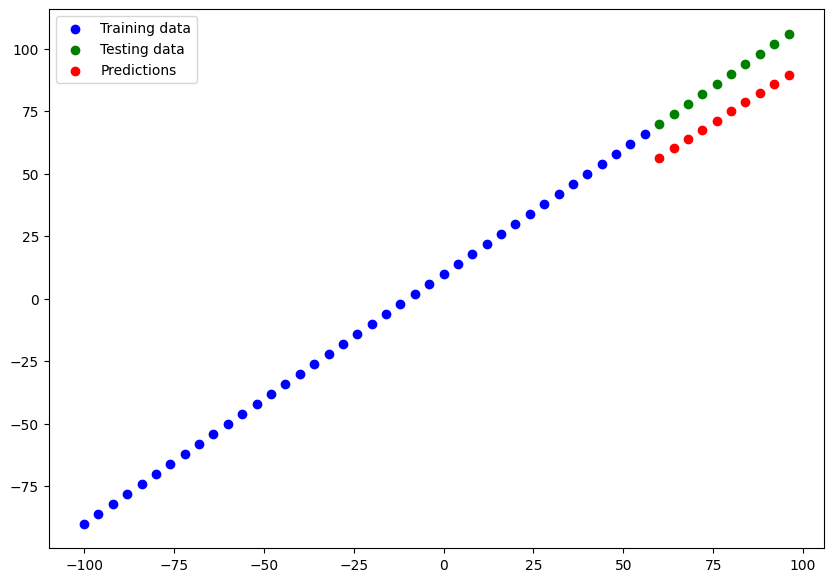

In [189]:
# make and plot predictions for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_1)

In [190]:
mae_1= mean_absolute_error(y_test,y_preds_1)
mse_1= mean_squared_error(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.928299>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.69185>)

In [191]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 25.1070 - mse: 872.4961
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.0551 - mse: 763.0120
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 23.8583 - mse: 826.6922
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5221 - mse: 309.4476
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 17.6414 - mse: 439.5092
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 12.9335 - mse: 232.0278
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.1511 - mse: 187.7297
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8993 - mse: 135.5493
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 37.9836 - mse: 2229.3621
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.5738 - mse: 918.3861
Epoch 11/100
2/2 [==============================

1/1 [==============================] - 0s 51ms/step


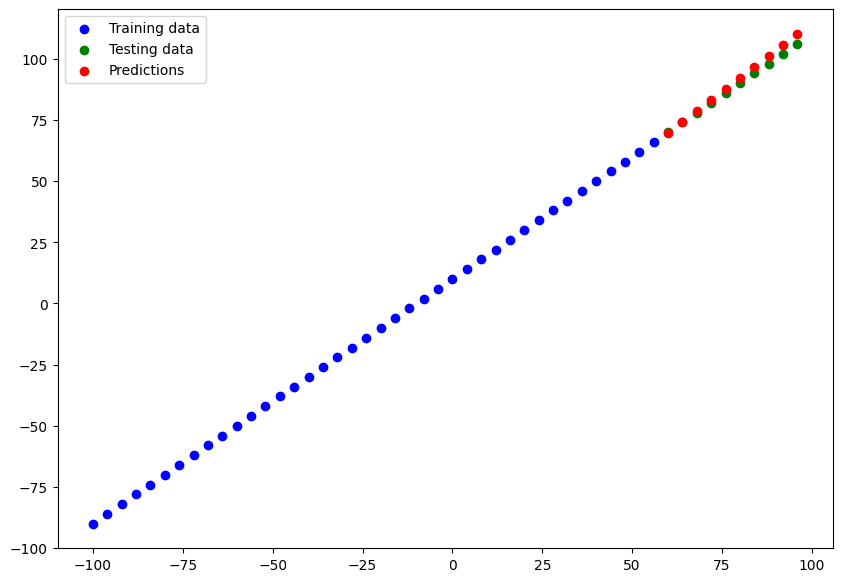

In [192]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_2)

In [193]:
# calculate model 2 evaluation metrics
mae_2 = mean_absolute_error(y_test,y_preds_2)
mse_2 = mean_squared_error(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9460838>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.647577>)

In [194]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 8ms/step - loss: 42.6491 - mse: 2713.1589
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 24.9531 - mse: 813.7568
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 29.3506 - mse: 1306.1365
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 13.3799 - mse: 245.1048
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 17.6041 - mse: 417.7173
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 10.2690 - mse: 120.8003
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2579 - mse: 153.7664
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1374 - mse: 164.0564
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 41.0508 - mse: 2669.5847
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 28.3730 - mse: 1135.7229
Epoch 11/500
2/2 [========================

1/1 [==============================] - 0s 59ms/step


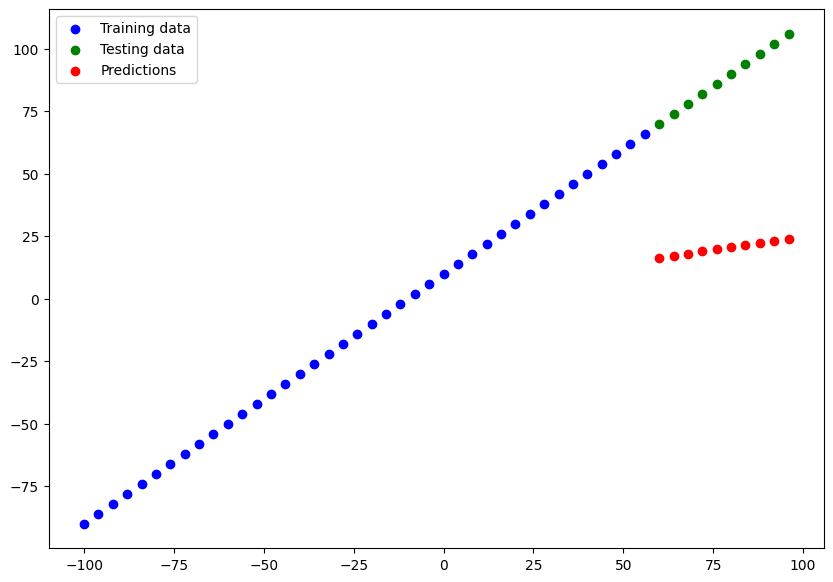

In [195]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_3)

In [196]:
# calculate model 2 evaluation metrics
mae_3 = mean_absolute_error(y_test,y_preds_3)
mse_3 = mean_squared_error(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.881676>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4692.225>)

**Note** You want to start with small experiments - start with small models then scale


### Comparing results of our experiments

We've run a few experiments let's compare the results

In [197]:
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],["model_2",mae_2.numpy(),mse_2.numpy()],["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.928299,223.691849
1,model_2,1.946084,5.647577
2,model_3,67.881676,4692.225098


``Looks like model 1 performed the best``

In [198]:
model_1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The mode experiments you do the more things you'll figure out which don't work and you'll get closer to what does work.  Remember: experiment,experiment,experiment.

## Tracking your experiements

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* Tensorboard - a component of the Tensorflow library to help track modelling experiments(will use later in course)
* Weights & Biases - a tool for tracking all kinds of ML experiments

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as a web application or a mobile application

There are two main formats we can save our model's as:

1. Saved model format
2. The HD5 format

In [199]:
model_1.save('./model_1')
!pwd

/content


In [200]:
model_1.save('./model_1.hdf5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model

In [201]:
loaded_saved_model = tf.keras.models.load_model('./model_1')
loaded_saved_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [202]:
model_1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [203]:
model_preds = loaded_saved_model.predict(X_test)

1/1 [==============================] - 0s 46ms/step


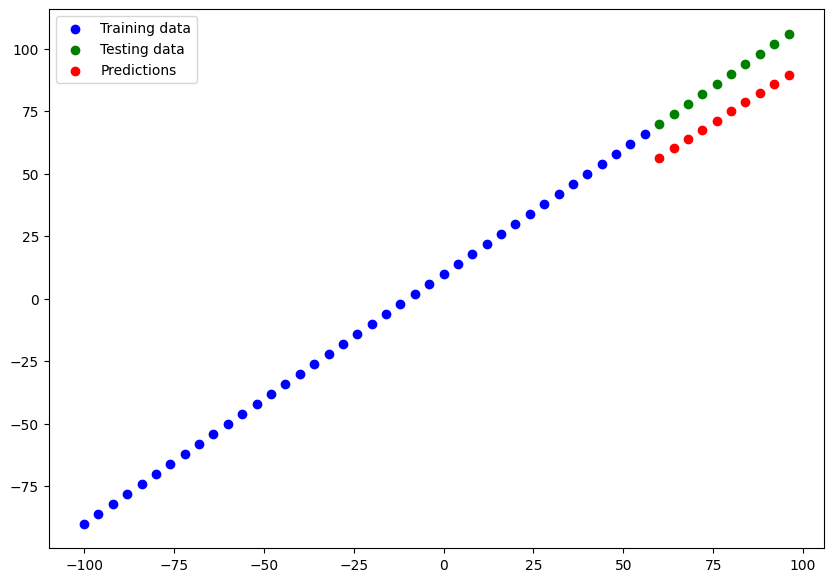

In [204]:
plot_predictions(X_train,y_train,X_test,y_test,model_preds)

In [205]:
y_preds_1 == model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [206]:
mean_absolute_error(y_true=y_test,y_pred=y_preds_1) == mean_absolute_error(y_true= y_test, y_pred = model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [207]:
model_preds

array([[56.505688],
       [60.187023],
       [63.86836 ],
       [67.54969 ],
       [71.23103 ],
       [74.91237 ],
       [78.593704],
       [82.27505 ],
       [85.95638 ],
       [89.63772 ]], dtype=float32)

In [208]:
y_preds_1

array([[56.505688],
       [60.187023],
       [63.86836 ],
       [67.54969 ],
       [71.23103 ],
       [74.91237 ],
       [78.593704],
       [82.27505 ],
       [85.95638 ],
       [89.63772 ]], dtype=float32)

In [209]:
# load model using h5

loaded_h5_model = tf.keras.models.load_model('./model_1.hdf5')
loaded_h5_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
model_1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [211]:
model_preds_hdf5 = loaded_h5_model.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [212]:
model_preds_hdf5 == y_preds_1

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file from Google Colab)

If you want to download your files from Colab:

1. Go to files tab and click download within Colab
2. run files.download
3. Save to google drive - mount drive and save to that file path

In [213]:
from google.colab import files
files.download("./model_1.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [214]:
!cp -r /content/model_1 /content/drive/MyDrive

### A larger example

In [215]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
# import in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [217]:
insurance["smoker"],insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [218]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [219]:
# Create X and Y values(features and lables)
# Create training and test sets
# build a neural network
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [220]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [221]:
# Creating training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [222]:
0.2 * 1338

267.6

In [223]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [224]:
# Build a neural network (like model 2)
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])
# compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8640.2607 - mae: 8640.2607
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7851.6777 - mae: 7851.6777
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7605.6968 - mae: 7605.6968
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7734.1240 - mae: 7734.1240
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7692.8413 - mae: 7692.8413
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7656.8442 - mae: 7656.8442
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7573.5742 - mae: 7573.5742
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7791.0601 - mae: 7791.0601
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7621.2026 - mae: 7621.2026
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7723.5156 - mae: 7723.5156

In [225]:
# check the results of insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8583.0947 - mae: 8583.0947


[8583.0947265625, 8583.0947265625]

In [226]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well let's try and improve it!

To try and improve our model we'll run 2 experiments:

1. Add an extra layer with more hidden units and use adam
2. Train for longer
3. Try different optimizers, learning_rate, and epochs

In [227]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13289.6396 - mae: 13289.6396
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13136.5166 - mae: 13136.5166
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12818.6445 - mae: 12818.6445
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12196.0742 - mae: 12196.0742
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11136.4736 - mae: 11136.4736
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9720.8027 - mae: 9720.8027
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8342.5078 - mae: 8342.5078
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7586.5586 - mae: 7586.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7434.4023 - mae: 7434.4023
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7412.0562 - mae:

In [228]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5028.2935 - mae: 5028.2935


[5028.29345703125, 5028.29345703125]

In [229]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13287.7324 - mae: 13287.7324
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13112.3691 - mae: 13112.3691
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12747.1455 - mae: 12747.1455
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12036.5859 - mae: 12036.5859
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10854.2021 - mae: 10854.2021
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9369.7383 - mae: 9369.7383
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8060.6123 - mae: 8060.6123
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7499.2749 - mae: 7499.2749
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7416.1099 - mae: 7416.1099
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7395.5825 - mae:

In [230]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3484.9268 - mae: 3484.9268


[3484.9267578125, 3484.9267578125]

In [231]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8583.0947 - mae: 8583.0947


[8583.0947265625, 8583.0947265625]

Text(0.5, 0, 'epochs')

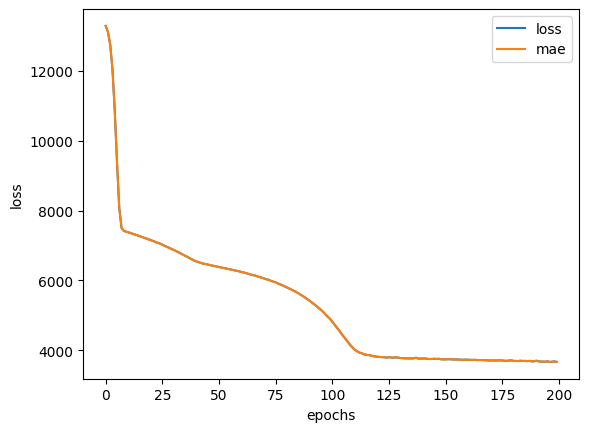

In [232]:
# Plot history(also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on.  However, many people have asked this question before... so Tensorflow has a solution! It's called the early stopping callback!  Early stopping is a Tensorflow component you can add to your model to stop training once it stops improving a certain metric.

## My experiment

In [233]:
# Build a neural network (like model 2)
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(11,activation="linear"),
    tf.keras.layers.Dense(50,activation="linear"),
    tf.keras.layers.Dense(50,activation="linear"),
    tf.keras.layers.Dense(1,activation="linear")
])
# compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])
# fit the model
insurance_model.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 9742.5879 - mae: 9742.5879
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 7327.5898 - mae: 7327.5898
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 7008.8711 - mae: 7008.8711
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 6615.5488 - mae: 6615.5488
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 6415.2656 - mae: 6415.2656
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 6188.1753 - mae: 6188.1753
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 5884.7563 - mae: 5884.7563
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 5166.6548 - mae: 5166.6548
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 4088.6519 - mae: 4088.6519
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 3952.6523 - mae: 3952.6523

In [234]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3178.7056 - mae: 3178.7056


[3178.70556640625, 3178.70556640625]

## Preprocessing data (Normalization and Standardization)

In terms of scaling values neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow some classes from scikit learn

In [236]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create column transformer
ct = make_column_transformer((MinMaxScaler(), ['age','bmi','children']),# turn all values in these columns between 0 and 1
 (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"]))

X = insurance.drop("charges",axis=1)
y = insurance["charges"]
# Build our train and test ssets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Fit the column transformer to our training data
ct.fit(X_train)
# Transform training and test data with normalization (MinMaxScalar) and (OneHotEncoder)
X_train_normal=ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [237]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [238]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.  Now let's build a neural network model and see how it works

In [239]:

tf.random.set_seed(42)
insurance_model_normalized = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
insurance_model_normalized.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
insurance_model_normalized.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.8721 - mae: 13343.8721
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.8184 - mae: 13335.8184
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13316.1592 - mae: 13316.1592
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13274.6309 - mae: 13274.6309
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13200.0527 - mae: 13200.0527
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13081.0664 - mae: 13081.0664
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12906.8408 - mae: 12906.8408
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12666.9639 - mae: 12666.9639
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12351.2578 - mae: 12351.2578
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11954.69

# evaluate our insurance model on trained data


In [240]:
insurance_model_normalized.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3438.3943 - mae: 3438.3943


[3438.394287109375, 3438.394287109375]

## My Experimental model with normalized data

In [241]:
# Build a neural network (like model 2)
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(11,activation="linear"),
    tf.keras.layers.Dense(50,activation="linear"),
    tf.keras.layers.Dense(50,activation="linear"),
    tf.keras.layers.Dense(1,activation="linear")
])
# compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])
# fit the model
insurance_model.fit(X_train_normal,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 2s 4ms/step - loss: 12588.1934 - mae: 12588.1934
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 8043.2373 - mae: 8043.2373
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 7005.8027 - mae: 7005.8027
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 4987.3589 - mae: 4987.3589
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 3657.0742 - mae: 3657.0742
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 3655.1765 - mae: 3655.1765
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 3581.9465 - mae: 3581.9465
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 3641.3840 - mae: 3641.3840
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 3617.9019 - mae: 3617.9019
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 3533.7664 - mae: 3533.76

In [242]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3165.5645 - mae: 3165.5645


[3165.564453125, 3165.564453125]

In [243]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


<Axes: ylabel='Frequency'>

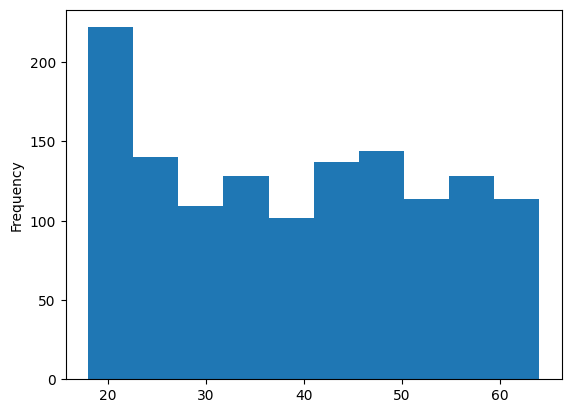

In [244]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

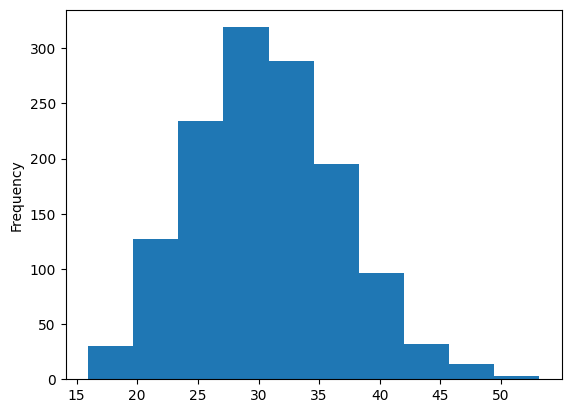

In [245]:
X["bmi"].plot(kind="hist")

In [246]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64